In [1]:
# !pip install wordcloud 

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%` not found.


In [3]:
# Load in the dataframe
df = pd.read_csv('Dataset_LirikLagu.csv', index_col=0)

In [4]:
# Looking at first 5 rows of the dataset
df.head()

,Judul_Lagu,Bait_Reff,NIM,Nama
No_IDLagu,,,,
1,Kukira Kau Rumah,Kukira kau rumah\nNyatanya kau cuma aku sewa\n...,1301170262,Fadhli Kamil Maulana
2,Monolog,Alasan masih bersama\nBukan karena terlanjur l...,1301170262,Fadhli Kamil Maulana
3,Bila,"Bila saja dikau bisa berbicara, oh\nIzinkan da...",1301170262,Fadhli Kamil Maulana
4,Seberapa Pantas,Celakanya\nHanya kaulah yang benar-benar aku t...,1301174510,Naufal Adi Nugroho
5,Dekat di Hati,Aku di sini dan kau di sana\nHanya berjumpa vi...,1301174510,Naufal Adi Nugroho


In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 75 observations and 4 features in this dataset. 



In [6]:
print("There are {} types of songs lyric in this dataset such as {}... \n".format(len(df.Judul_Lagu.unique()),
                                                                           ", ".join(df.Judul_Lagu.unique()[0:5])))

There are 75 types of songs lyric in this dataset such as Kukira Kau Rumah, Monolog, Bila, Seberapa Pantas, Dekat di Hati... 



In [7]:
df[["Judul_Lagu", "Bait_Reff", "Nama"]].head()

,Judul_Lagu,Bait_Reff,Nama
No_IDLagu,,,
1,Kukira Kau Rumah,Kukira kau rumah\nNyatanya kau cuma aku sewa\n...,Fadhli Kamil Maulana
2,Monolog,Alasan masih bersama\nBukan karena terlanjur l...,Fadhli Kamil Maulana
3,Bila,"Bila saja dikau bisa berbicara, oh\nIzinkan da...",Fadhli Kamil Maulana
4,Seberapa Pantas,Celakanya\nHanya kaulah yang benar-benar aku t...,Naufal Adi Nugroho
5,Dekat di Hati,Aku di sini dan kau di sana\nHanya berjumpa vi...,Naufal Adi Nugroho


In [8]:
?WordCloud

# Text Cleaning and Preparation
### 1. remove special character

In [9]:
import string

df['reff_clean'] = df['Bait_Reff'].str.replace("\r", " ")
df['reff_clean'] = df['reff_clean'].str.replace("\n", " ")
df['reff_clean'] = df['reff_clean'].str.replace('"','')
df['reff_clean'] = df['reff_clean'].str.lower()
df['reff_clean'] = df['reff_clean'].str.translate(str.maketrans("","",string.punctuation))

### 2. remove punctuation

In [10]:
punct_sign = list("?:!.,;")
for punct in punct_sign:
  df['reff_clean'] = df['reff_clean'].str.replace(punct,'')

### 3. stemming

In [11]:
# !pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
for idx, row in df.iterrows():
  temp_lirik = df.loc[idx,'reff_clean']
  hasil = stemmer.stem(temp_lirik)
  df.loc[idx, 'reff_clean'] = hasil

### Most Common Word

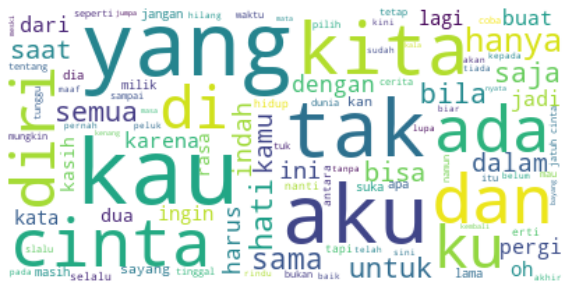

In [12]:
text = df['reff_clean'].tolist()
text = ' '.join(text)
wc = WordCloud(max_words=100, background_color="white").generate(text)
plt.figure( figsize=(10,6) )
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

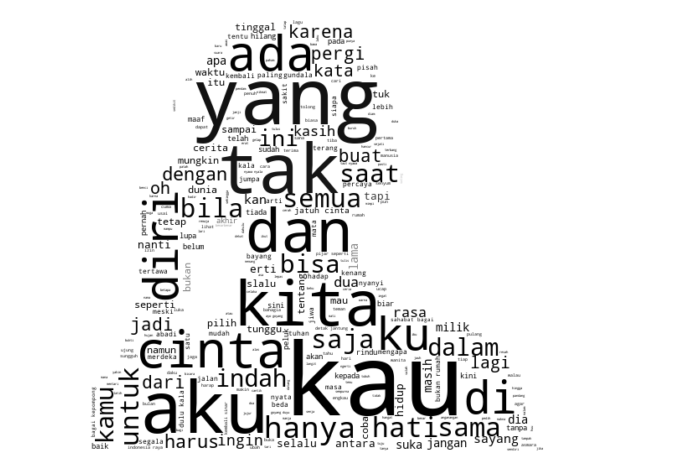

In [19]:
mask = np.array(Image.open("image.jpg"))
song = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(song.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/listening_music.png", format="png")

plt.show()

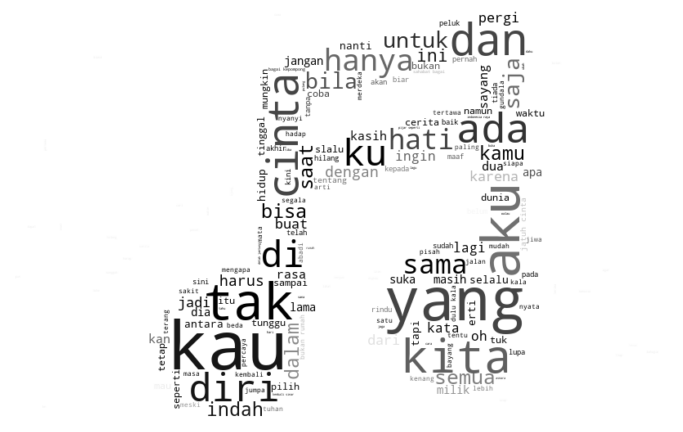

In [20]:
mask = np.array(Image.open("song.jpg"))
music = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(music.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/music.png", format="png")

plt.show()